In [1]:
# for cleaning up after tests
import os
dir = "../calibrate/stacks/"
for f in os.listdir(dir):
    if ".bin" in f:
        os.remove(os.path.join(dir, f))

In [2]:
# setup the dirs and things
import os
from dataclasses import dataclass

@dataclass
class Dir:
    path: str
    date: str
    bag: str = None
    clicks: str = None
root = "../calibrate"
data_dirs = []
dir_files = Dir(root, "test")
dir_files.bag = os.path.join(root, "rtk-co-locate.bag")
dir_files.clicks = os.path.join(root, "rtk-clicks.csv")
data_dirs.append(dir_files)

In [3]:
# %load_ext autoreload
# %autoreload 2
import rospy
from banners import *
import pdb 
from cv_bridge import CvBridge
from sensor_msgs.msg import Image

bridge = CvBridge()
# from csv_relations import *
# import csv_relations

def done(fname, obj):
    with open(fname, 'wb') as f:
        pickle.dump(obj, f, protocol=2)

# get all dirs with data and order by date
'''
data_dirs = []
for dd in os.listdir(root):
    d = os.path.join(root, dd)
    print(d)
    if os.path.isdir(d):
        dir_files = Dir(d, dd)
        for f in os.listdir(d):
            if ".bag" in f:
                dir_files.bag = os.path.join(d, f)
            if ".csv" in f:
                dir_files.clicks = os.path.join(d, f)
        data_dirs.append(dir_files)
'''
print(data_dirs)

TOPICS = ['/current_pose', '/cam0/nv12_decode_result', '/cam1/nv12_decode_result', '/therm/image_raw_throttle']
cc = CameraCombo()
i = 0
# process each bag
for a in data_dirs:
    
    bag = rosbag.Bag(a.bag)
    for topic, msg, t in bag.read_messages(TOPICS):
        cc.dir = a
        # stack 3 images together
        if topic == '/therm/image_raw_throttle':
            # print("thermal")
            cc.flir = msg
        if topic == '/cam1/nv12_decode_result':
            # print("rgb")
            cc.rgb = msg

        if topic == '/cam0/nv12_decode_result':
            # print("noir")
            cc.noir = msg
        if topic == "/current_pose":
            # print("stacking")
            cc.pose = msg.pose.pose
            cc.stack(t)
            # i += 1
            # if i == 10:
            #     break
    # processed_data.append(cc)
    cc.done()

[Dir(path='../calibrate', date='test', bag='../calibrate/rtk-co-locate.bag', clicks='../calibrate/rtk-clicks.csv')]


In [4]:
%reload_ext autoreload
%autoreload 2
import csv_relations


proc_click = []

origin = None

data_dirs[0].clicks = '../calibrate/rtk-click.csv'

# go over the CSVs
for a in data_dirs:
    C = csv_relations.CSVAugmented(a.clicks, a.path)
    C.csv_read()
    C.done()
    proc_click.append(C)

In [5]:
p = proc_click[0]
print(p.click_data)
print(cc.parsed.iloc[0].pose)

               x             y  health
0  583843.180345  4.090570e+06     1.0
[[-1.04066917e-01  7.33773690e-01 -6.71376384e-01  5.83841358e+05]
 [-9.64462757e-01 -2.39290806e-01 -1.12033479e-01  4.09057157e+06]
 [-2.42861415e-01  6.35858539e-01  7.32599652e-01  1.00000000e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [19]:
%reload_ext autoreload
%autoreload 2
import data_relater
from banners import *

relations = None

D = data_relater.Relater()
for a in data_dirs:
    D.cc.dir = a
    D.cc.uptake()
    relations = D.clicks_to_image(p, 55)
# D.cc.dir = 
# D.cc.uptake()
# D.clicks_to_image(p, 55)

(1, 3)
[[-1.06905773]
 [ 8.08026762]
 [ 6.28236711]]
(1, 3)
[[-2.42985233]
 [ 7.4558724 ]
 [ 6.66212872]]
(1, 3)
[[-2.43818206]
 [ 7.45293299]
 [ 6.66202394]]
(1, 3)
[[-3.59686968]
 [ 6.71312512]
 [ 6.91747968]]
(1, 3)
[[-3.60097281]
 [ 6.70733679]
 [ 6.92034723]]
(1, 3)
[[-4.5504134 ]
 [ 5.92363469]
 [ 7.07545927]]
(1, 3)
[[-5.38477516]
 [ 5.06273566]
 [ 7.15633656]]
(1, 3)
[[-5.38896932]
 [ 5.05831985]
 [ 7.1559546 ]]
(1, 3)
[[-6.06668003]
 [ 4.20846802]
 [ 7.16413451]]
(1, 3)
[[-6.07263368]
 [ 4.20385182]
 [ 7.16145196]]
(1, 3)
[[-6.60955648]
 [ 3.38521275]
 [ 7.11907967]]
(1, 3)
[[-7.04932311]
 [ 2.56858796]
 [ 7.03801531]]
(1, 3)
[[-7.05350919]
 [ 2.56177329]
 [ 7.03526518]]
(1, 3)
[[-7.39013975]
 [ 1.79472831]
 [ 6.92545799]]
(1, 3)
[[-7.39291154]
 [ 1.78877873]
 [ 6.92315634]]
(1, 3)
[[-7.64636295]
 [ 1.07604823]
 [ 6.79304314]]
(1, 3)
[[-7.83547352]
 [ 0.39211985]
 [ 6.64879395]]
(1, 3)
[[-7.83644853]
 [ 0.3872943 ]
 [ 6.64721459]]
(1, 3)
[[-7.96682237]
 [-0.23978369]
 [ 6.4970

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            545, 546, 547, 548, 549, 550, 551, 552, 553, 554],
           dtype='int64', length=555)
(1080, 1920, 3)
-381.42883882567247 [-1598.39380072]


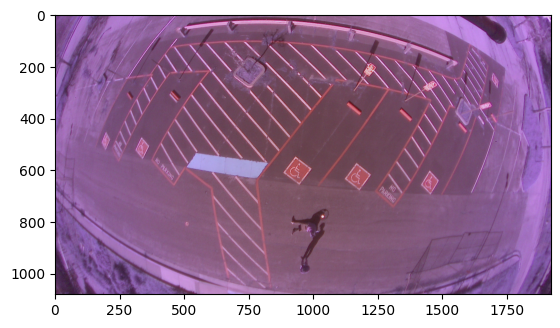

In [21]:
import matplotlib.pyplot as plt

def pretty_image(df, idx):
    row = df.iloc[idx]
    with open(row['stack_location'], 'rb') as f:
        stack = pickle.load(f)
        rgb = bridge.imgmsg_to_cv2(stack['rgb'], desired_encoding='passthrough')
        print(rgb.shape)
        points = row['pixel_points']
        print(points[0].item(), points[1])
        rgb = cv2.circle(rgb, (int(points[0].item()), int(points[1].item())), 25, (0, 0, 255), 4)
        plt.imshow(rgb)

print(relations.index)
pretty_image(relations, 300)